In [1]:
## The dataset is taken from https://urbansounddataset.weebly.com/download-urbansound8k.html

In [2]:
import matplotlib.pyplot as plt

In [3]:
filename='../UrbanSound8K/audio/fold1/7061-6-0-0.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

the shape is: (49613,)


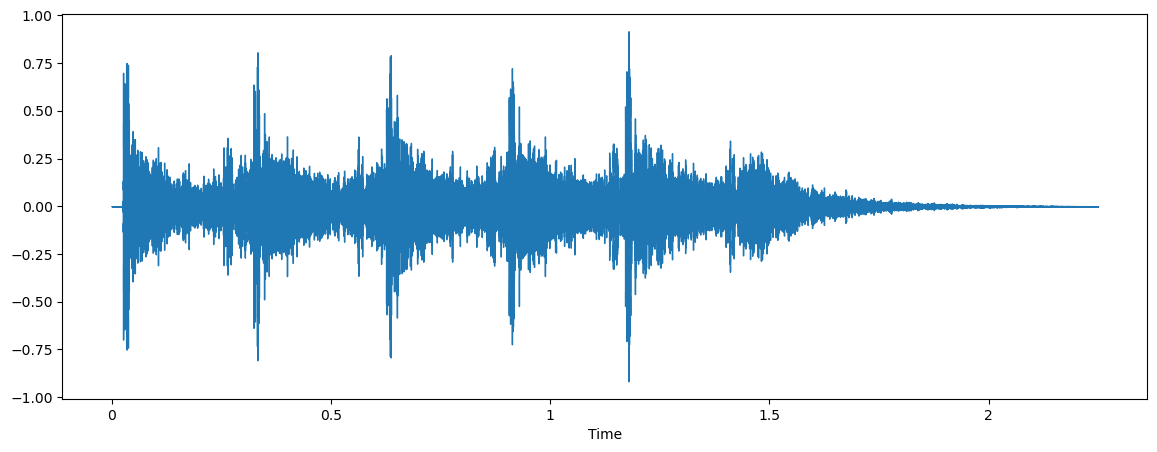

In [5]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename) 
# to reproduce a sound we need the sample rate
# librosa normalize the signal (between -1 and 1),
# and we obtain a signal with 22050 of sample rate
# What is the sample rate? number of samples in a second
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)
#### REMARK: librosa by defaul convert to "MONO", it means only one channel for the signal
#### if it was in "STEREO", we can have 2,3,4, ..  signals
print("the shape is:",data.shape)


In [6]:
from scipy.io import wavfile as wav
# Each wave file HAS a sample rate. scipy.io.wavfile.read tells you what that rate is.
# if you want another sample rate, you need to convert it!
wave_sample_rate, wave_audio=wav.read(filename)
print("using wavfile instead the original sample rate is",wave_sample_rate)
print("here, the shape is",wave_audio.shape)

using wavfile instead the original sample rate is 44100
here, the shape is (99225, 2)


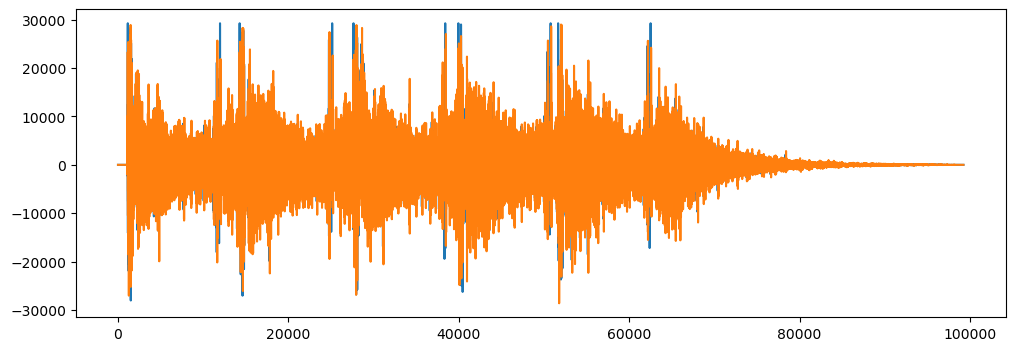

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
plt.show()
## here the 2 channels

In [8]:
import pandas as pd

metadata=pd.read_csv('../UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [9]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64